# Title: Why The A's Left Oakland

#### An analysis of the attendance issues of the Oakland A's, and whether Oakland is capable of hosting a Major League team.

The Oakland Athletics' departure from the Bay Area has been attributed to low attendance. But was it really that simple? This analysis examines decades of attendance data and team performance to see how the A's compared to the rest of Major League Baseball.

In [1]:
# imports
import pandas as pd
import pybaseball as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image

In [2]:
# import data
OAK_24 = pd.DataFrame(mlb.schedule_and_record(2024, "OAK"))
OAK_24_home = OAK_24[OAK_24["Home_Away"] == "Home"]

OAK_24_home["Year"] = 2024
#OAK_24_home[['Date', 'Tm', 'Opp', 'W/L', 'R', 'RA', 'W-L',
#       'Rank', 'GB', 'Time', 'D/N', 'Attendance', 'cLI',
#       'Streak', 'Year']].head()

http://www.baseball-reference.com/teams/OAK/2024-schedule-scores.shtml


/var/folders/tr/861tz2hd71n7n5t7kb5vpf1h0000gn/T/ipykernel_97477/2515714749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OAK_24_home["Year"] = 2024


In [3]:
OAK_temp = pd.DataFrame()
for i in range(1968,2025):
    temp = mlb.schedule_and_record(i, "OAK")
    #temp = temp[temp["Home_Away"] == "Home"]
    temp["Year"] = i
    OAK_temp = pd.concat([OAK_temp, temp[['Date', 'Tm', 'Opp', 'Home_Away', 'W/L', 'R', 'RA', 'W-L',
       'Rank', 'GB', 'D/N', 'Attendance', 'cLI', 'Streak', 'Year']]])

http://www.baseball-reference.com/teams/OAK/1968-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1969-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1970-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1971-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1972-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1973-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1974-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1975-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1976-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1977-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1978-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1979-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1980-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/1981-schedule-scores.shtml
http:/

In [4]:
# remove away games
OAK_temp[['Wins', 'Losses']] = OAK_temp['W-L'].str.split('-', expand=True).astype(int)
OAK_temp['SeasonWins'] = OAK_temp.groupby('Year')['Wins'].transform('max')
OAK_temp = OAK_temp[OAK_temp["Home_Away"] == "Home"]

In [5]:
# clean up columns
OAK_temp[['Weekday', 'Date']] = OAK_temp['Date'].str.split(', ', expand=True)
OAK_temp['Date'] = OAK_temp['Date'].str.replace(r"\s*\(.*\)", "", regex=True)
OAK_temp['Date'] = pd.to_datetime(OAK_temp['Date'] + ' ' + OAK_temp['Year'].astype(str))
OAK_temp['W/L'] = OAK_temp['W/L'].str.split('-').str[0]
OAK = OAK_temp[['Tm', 'Year', 'Opp', 'Date', 'Weekday', 'D/N', 'Wins', 'Losses', 'Streak', 
              'Rank', 'GB', 'W/L', 'SeasonWins', 'R', 'RA', 'cLI', 'Attendance']]

In [6]:
# remove 2020 from the data
OAK = OAK[OAK['Year'] != 2020]

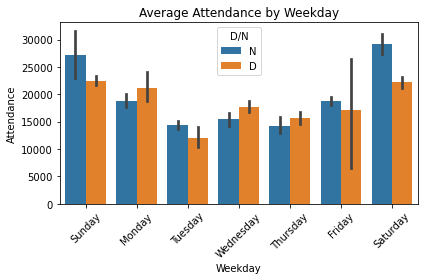

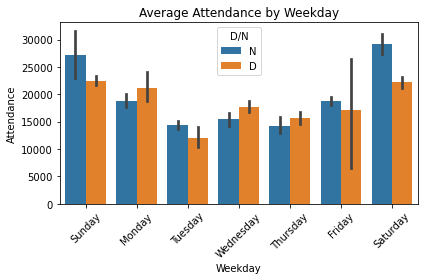

In [7]:
sns.barplot(data=OAK, x='Weekday', y='Attendance', estimator=np.mean, order=['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], hue = 'D/N')
plt.title('Average Attendance by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/weekday_attendance.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/weekday_attendance.png')

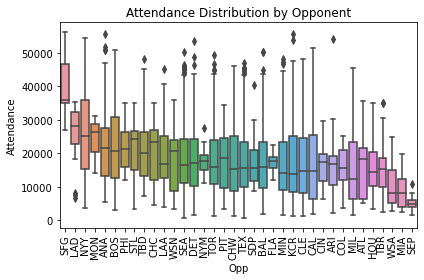

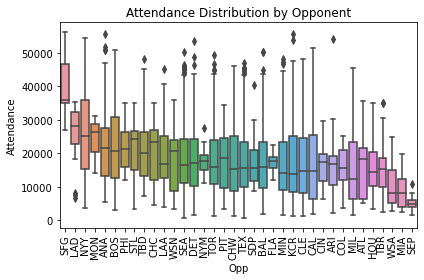

In [8]:
sns.boxplot(data=OAK, x='Opp', y='Attendance', order = OAK.groupby('Opp')['Attendance'].mean().sort_values(ascending = False).index)
#OAK.groupby('Opp')['Attendance'].mean().plot(kind = 'box')
plt.title('Attendance Distribution by Opponent')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/opponent_attendance.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/opponent_attendance.png')

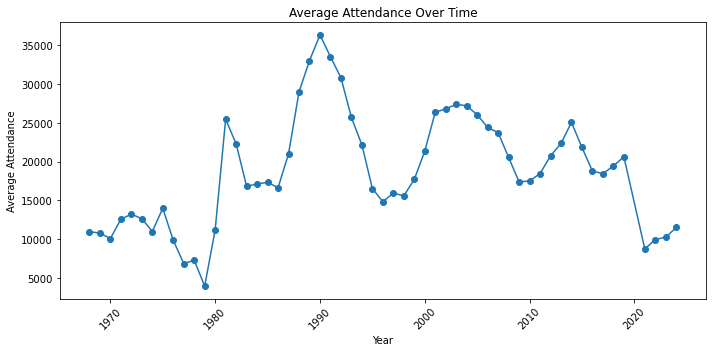

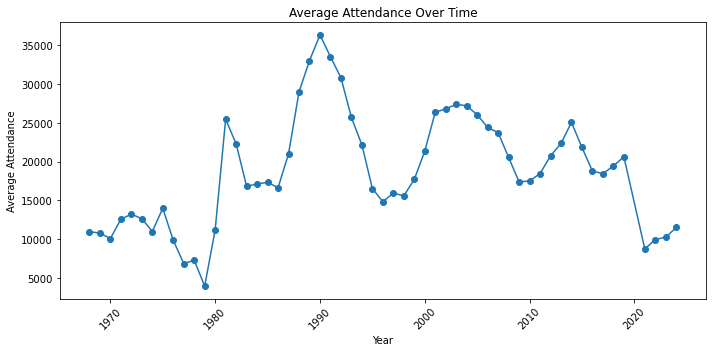

In [9]:
OAK.groupby('Year')['Attendance'].mean().plot(kind='line', marker='o', title='Average Attendance Over Time', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/attendance_over_time.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/attendance_over_time.png')

To understand Oakland's attendance in context, we need to compare it to the rest of the league.


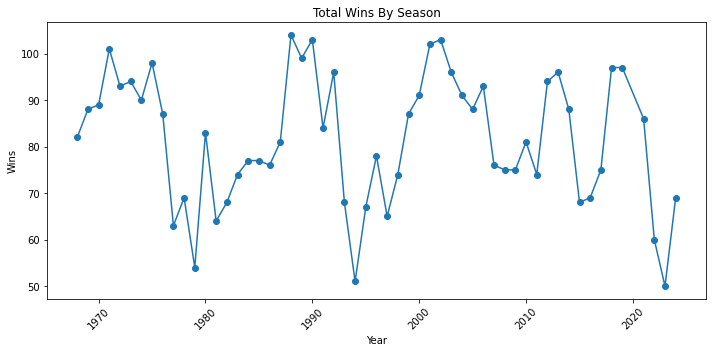

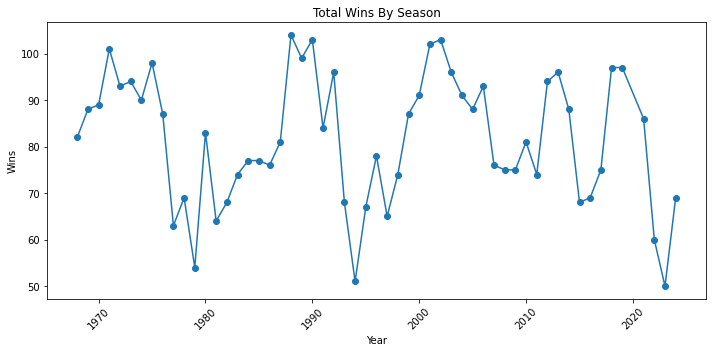

In [10]:
OAK.groupby('Year')['SeasonWins'].mean().plot(kind='line', marker='o', title='Total Wins By Season', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/wins_over_time.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/wins_over_time.png')

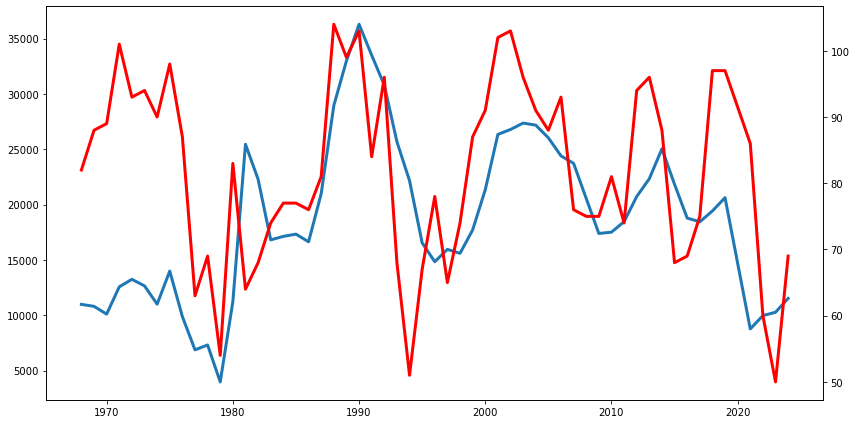

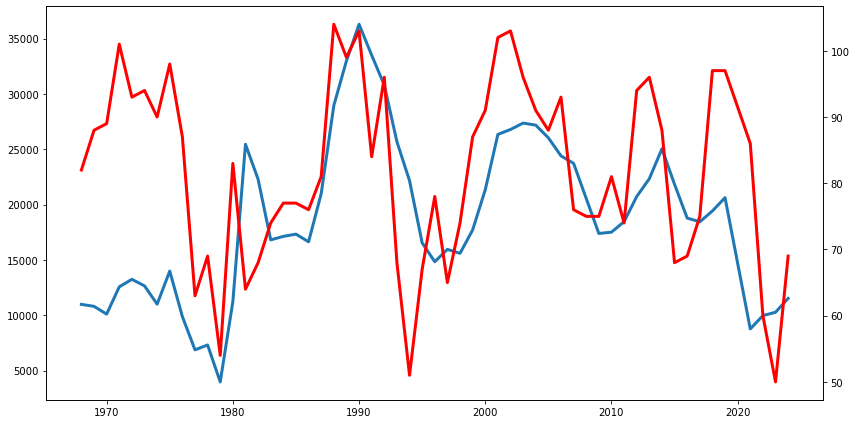

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  

ax1.plot(OAK.groupby('Year')['Attendance'].mean(), linewidth = 3)
ax2.plot(OAK.groupby('Year')['SeasonWins'].mean(), linewidth = 3, color = 'red')

plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/attendance_wins_overlay.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/attendance_wins_overlay.png')

Even when accounting for league-wide trends, Oakland's attendance consistently ranked among the worst in baseball. Despite competitive seasons, the A's rarely climbed above the bottom tier.

In [12]:
# List of current MLB team abbreviations
teams = [
    'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
    'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
    'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN'
]

# Empty master DataFrame
all_teams = pd.DataFrame()

# Loop over each team and year
for team in teams:
    team_data = pd.DataFrame()
    for year in range(1968, 2025):
        try:
            temp = mlb.schedule_and_record(year, team)
            temp["Year"] = year
            temp = temp[['Date', 'Tm', 'Opp', 'Home_Away', 'W/L', 'R', 'RA', 'W-L',
                         'Rank', 'GB', 'D/N', 'Attendance', 'cLI', 'Streak', 'Year']]
            team_data = pd.concat([team_data, temp], ignore_index=True)
        except Exception as e:
            print(f"Failed for {team} in {year}: {e}")
    
    # Clean and filter team data
    try:
        team_data[['Wins', 'Losses']] = team_data['W-L'].str.split('-', expand=True).astype(int)
        team_data['SeasonWins'] = team_data.groupby('Year')['Wins'].transform('max')
        team_data = team_data[team_data['Home_Away'] == "Home"]
        team_data[['Weekday', 'Date']] = team_data['Date'].str.split(', ', expand=True)
        team_data['Date'] = team_data['Date'].str.replace(r"\s*\(.*\)", "", regex=True)
        team_data['Date'] = pd.to_datetime(team_data['Date'] + ' ' + team_data['Year'].astype(str), errors='coerce')
        team_data['W/L'] = team_data['W/L'].str.split('-').str[0]
        
        # Final cleaned DataFrame for this team
        team_cleaned = team_data[['Tm', 'Year', 'Opp', 'Date', 'Weekday', 'D/N', 'Wins', 'Losses',
                                  'Streak', 'Rank', 'GB', 'W/L', 'SeasonWins', 'R', 'RA', 'cLI', 'Attendance']]
        all_teams = pd.concat([all_teams, team_cleaned], ignore_index=True)
    except Exception as e:
        print(f"Cleaning failed for {team}: {e}")

# Remove 2020 data
all_teams = all_teams[all_teams['Year'] != 2020]

all_teams.head()
all_teams.tail()

Failed for ARI in 1968: Season cannot be before first year of a team's existence
Failed for ARI in 1969: Season cannot be before first year of a team's existence
Failed for ARI in 1970: Season cannot be before first year of a team's existence
Failed for ARI in 1971: Season cannot be before first year of a team's existence
Failed for ARI in 1972: Season cannot be before first year of a team's existence
Failed for ARI in 1973: Season cannot be before first year of a team's existence
Failed for ARI in 1974: Season cannot be before first year of a team's existence
Failed for ARI in 1975: Season cannot be before first year of a team's existence
Failed for ARI in 1976: Season cannot be before first year of a team's existence
Failed for ARI in 1977: Season cannot be before first year of a team's existence
Failed for ARI in 1978: Season cannot be before first year of a team's existence
Failed for ARI in 1979: Season cannot be before first year of a team's existence
Failed for ARI in 1980: Seas

KeyboardInterrupt: 

In [ ]:
sns.boxplot(data=all_teams, x='Tm', y='Attendance', order = all_teams.groupby('Tm')['Attendance'].mean().sort_values(ascending = False).index)
plt.title('Attendance Distribution by Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/team_attendance_dist.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/team_attendance_dist.png')

KeyError: 'Tm'

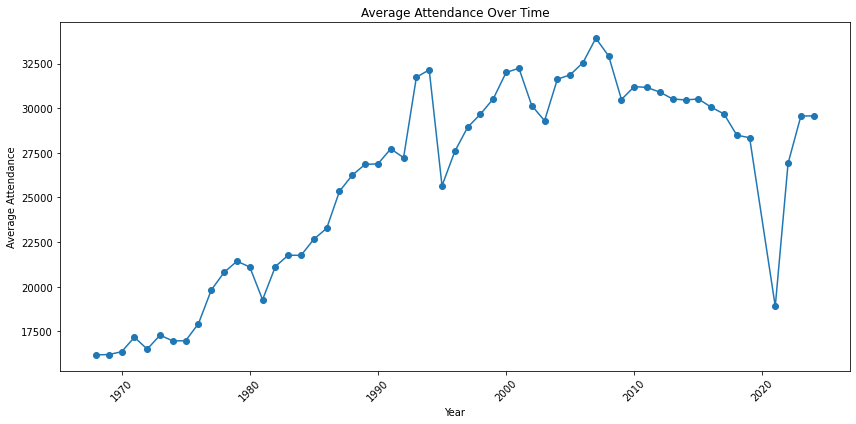

In [ ]:
all_teams.groupby('Year')['Attendance'].mean().plot(kind='line', marker='o', title='Average Attendance Over Time', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/league_attendance_over_time.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/league_attendance_over_time.png')

In [ ]:
all_grouped = (
    all_teams
    .groupby(['Tm', 'Year'], as_index=False)
    .agg({
        'SeasonWins': 'max',      # Each game in season has same 'SeasonWins' → use max or first
        'Attendance': 'mean'      # Average attendance per home game
    })
)

,Tm,Year,SeasonWins,Attendance
0,ARI,2000,85,36324.086420
1,ARI,2001,92,33775.567901
2,ARI,2002,98,39493.518519
3,ARI,2003,84,34636.320988
4,ARI,2004,51,31105.679012


The most telling finding: when plotting attendance against wins, Oakland consistently falls below the trend line. Even during 90+ win seasons, attendance lagged behind teams with similar records.


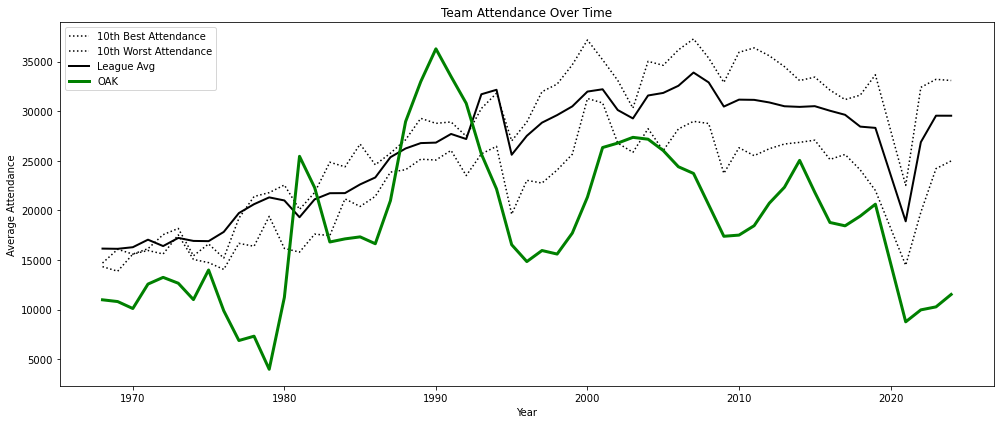

In [ ]:
# Copy the grouped DataFrame
df = all_grouped.copy()

# Get sorted list of years
years = sorted(df['Year'].unique())

# Prepare attendance series
tenth_best_attendance = []
tenth_worst_attendance = []
avg_attendance = []
oak_attendance = []

for year in years:
    yearly = df[df['Year'] == year].sort_values('Attendance', ascending=False).reset_index(drop=True)
    
    # Get 10th best and 10th worst attendance values
    if len(yearly) >= 10:
        tenth_best = yearly.loc[9, 'Attendance']  # 10th from top
        tenth_worst = yearly.sort_values('Attendance').reset_index(drop=True).loc[9, 'Attendance']  # 10th from bottom
    else:
        tenth_best = None
        tenth_worst = None
    
    # Add to lists
    tenth_best_attendance.append(tenth_best)
    tenth_worst_attendance.append(tenth_worst)
    avg_attendance.append(yearly['Attendance'].mean())
    
    oak_row = yearly[yearly['Tm'] == 'OAK']
    oak_attendance.append(oak_row['Attendance'].values[0] if not oak_row.empty else None)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(years, tenth_best_attendance, linestyle='dotted', color='black', label='10th Best Attendance')
plt.plot(years, tenth_worst_attendance, linestyle='dotted', color='black', label='10th Worst Attendance')
plt.plot(years, avg_attendance, color='black', linewidth=2, label='League Avg')
plt.plot(years, oak_attendance, color='green', linewidth=3, label='OAK')

plt.title('Team Attendance Over Time')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.legend()
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/oak_vs_league_attendance.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/oak_vs_league_attendance.png')

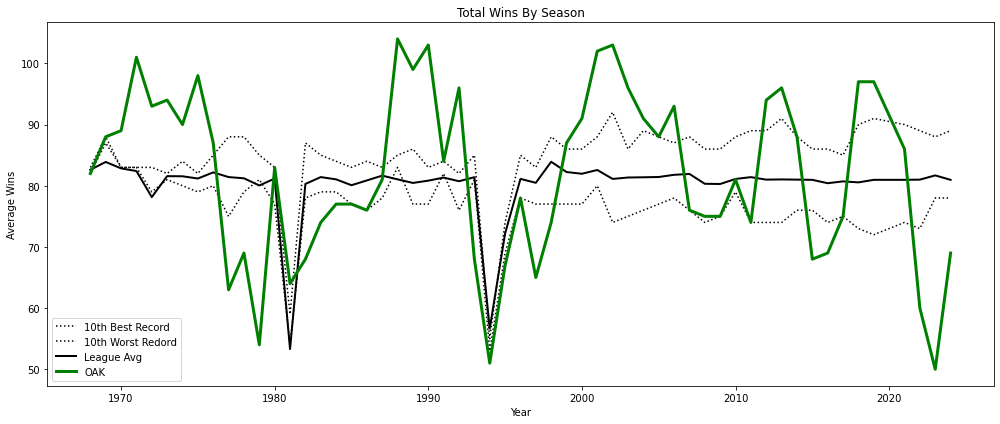

In [ ]:
# Copy the grouped DataFrame
df = all_grouped.copy()

# Get sorted list of years
years = sorted(df['Year'].unique())

# Prepare attendance series
tenth_best_attendance = []
tenth_worst_attendance = []
avg_attendance = []
oak_attendance = []

for year in years:
    yearly = df[df['Year'] == year].sort_values('SeasonWins', ascending=False).reset_index(drop=True)
    
    # Get 10th best and 10th worst attendance values
    if len(yearly) >= 10:
        tenth_best = yearly.loc[9, 'SeasonWins']  # 10th from top
        tenth_worst = yearly.sort_values('SeasonWins').reset_index(drop=True).loc[9, 'SeasonWins']  # 10th from bottom
    else:
        tenth_best = None
        tenth_worst = None
    
    # Add to lists
    tenth_best_attendance.append(tenth_best)
    tenth_worst_attendance.append(tenth_worst)
    avg_attendance.append(yearly['SeasonWins'].mean())
    
    oak_row = yearly[yearly['Tm'] == 'OAK']
    oak_attendance.append(oak_row['SeasonWins'].values[0] if not oak_row.empty else None)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(years, tenth_best_attendance, linestyle='dotted', color='black', label='10th Best Record')
plt.plot(years, tenth_worst_attendance, linestyle='dotted', color='black', label='10th Worst Redord')
plt.plot(years, avg_attendance, color='black', linewidth=2, label='League Avg')
plt.plot(years, oak_attendance, color='green', linewidth=3, label='OAK')

plt.title('Total Wins By Season')
plt.xlabel('Year')
plt.ylabel('Average Wins')
plt.legend()
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/oak_vs_league_wins.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/oak_vs_league_wins.png')

The numbers are clear: even during successful seasons, Oakland's attendance ranked among the worst in baseball. When compared to teams with similar win totals, the A's consistently underperformed. The attendance problem wasn't just about losing — it was a deeper issue with the market's support for the team.

*All data sourced from Baseball-Reference.com via pybaseball*


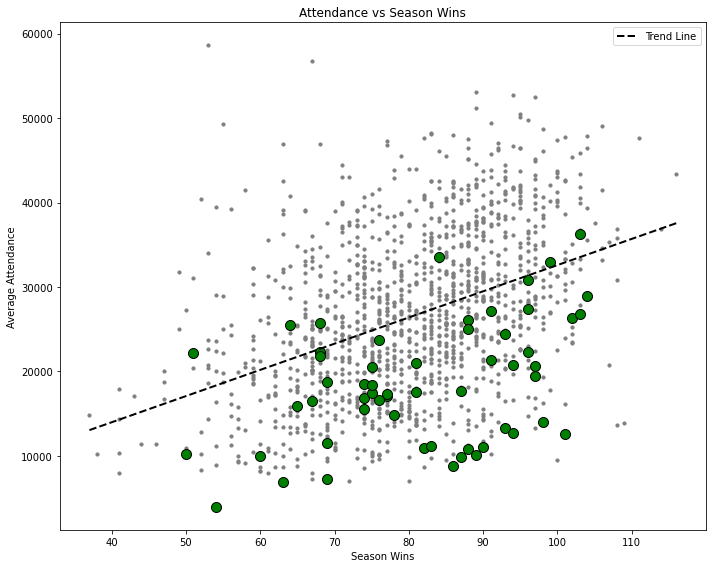

In [ ]:
plt.figure(figsize=(10, 8))

# every team
plt.scatter(
    all_grouped['SeasonWins'], 
    all_grouped['Attendance'], 
    s = 10, 
    color = 'gray')

# oakland
plt.scatter(
    all_grouped[all_grouped['Tm'] == 'OAK']['SeasonWins'],
    all_grouped[all_grouped['Tm'] == 'OAK']['Attendance'],
    s = 100,
    color='green',
    edgecolor = 'black')

# Fit the trend line
coeffs = np.polyfit(all_grouped['SeasonWins'], all_grouped['Attendance'], 1)
trend_fn = np.poly1d(coeffs)

# Create smooth x values for the line
x_line = np.linspace(all_grouped['SeasonWins'].min(), all_grouped['SeasonWins'].max(), 100)
y_line = trend_fn(x_line)

# Plot the trend line
plt.plot(x_line, y_line, color='black', linestyle='--', linewidth=2, label='Trend Line')

# Final plot settings
plt.xlabel('Season Wins')
plt.ylabel('Average Attendance')
plt.title('Attendance vs Season Wins')
plt.legend()
plt.tight_layout()
plt.savefig('../assets/images/2025-5-30-Athletics/attendance_vs_wins.png', bbox_inches='tight')
Image(filename='../assets/images/2025-5-30-Athletics/attendance_vs_wins.png')